# **Project Title: Predictive Modeling of Price Range Variations in 4H Timeframes of EURUSD Based on Economic News Sentiment Analysis**

**Overview:** This data science project aims to develop a predictive model for variations in the price range of the Euro/US Dollar (EURUSD) pair concerning predictions derived from sentiment analysis of economic news calendars.

**SUMMARY**

**PART 1 - Use Case and Data Acquisition**: The EUR/USD Forex Trading Data 4 Hrs Gap dataset (2003-2021) from https://www.kaggle.com/datasets/chandrimad31/eurusd-forex-trading-data-20032021 is utilized for calculating and obtaining the price range variation of the EUR/USD pair in 4H timeframes. Additionally, financial calendar data from 2003 to 2023 is collected from https://br.investing.com/economic-calendar/ using the investpy module.

**PART 2 - Data Cleaning and Processing (Evaluation, Exploration, Visualization, and Feature Engineering)**: The cleaned and processed dataset, EURUSD_clean.VER1.1.csv, contains information related to the EUR/USD Forex Trading Data 4 Hrs Gap (2003-2021). The calendar_clean.VER1.3.csv dataset results from cleaning and processing. The merging of these two datasets yields the Projeto_IBM_Ver1.6.csv dataset.

**PART 3 - Selection of Machine Learning and Deep Learning Models (Considering Different Feature Engineering)**: As the goal is to create a predictive model, a supervised approach is adopted. Since the outcomes of price range variation are continuous, a non-deep learning algorithm, Linear Regression, and a deep learning algorithm, Long Short-Term Memory (LSTM), are employed after multiple tests on various models. Sensible parameters were optimized to enhance the model's performance on the collected data.

**PART 4 - Selection and Justification of Performance Indicator**: Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared, Relative Squared Error, Absolute Relative Error, and Residual Plots concerning predictors are chosen as performance indicators.

**PART 5 - Final Considerations and Next Steps**

# **PART 1 - Use Case and Data Acquisition**

Loading Data from the Spreadsheet EURUSD_ForexTrading_4hrs_05.05.2003_to_16.10.2021.csv Available at https://www.kaggle.com/datasets/chandrimad31/eurusd-forex-trading-data-20032021?resource=download

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df_eurusd = pd.read_csv('/content/EURUSD_ForexTrading_4hrs_05.05.2003_to_16.10.2021.csv')

# Display the number of rows and columns using display
num_rows, num_columns = df_eurusd.shape
display(f'The DataFrame has {num_rows} rows and {num_columns} columns.')

# Display the DataFrame using display
display(df_eurusd)

'O DataFrame tem 28860 linhas e 6 colunas.'

,Gmt time,open,high,low,close,volume
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12166,1.12274,95533.0976
1,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996
2,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992
3,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992
4,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083
...,...,...,...,...,...,...
28855,15.10.2021 01:00:00.000,1.15940,1.16120,1.15938,1.16082,5738.6300
28856,15.10.2021 05:00:00.000,1.16082,1.16189,1.15995,1.16034,13149.6600
28857,15.10.2021 09:00:00.000,1.16033,1.16124,1.15892,1.15923,14914.3300
28858,15.10.2021 13:00:00.000,1.15923,1.16103,1.15893,1.15953,20002.5300


For data retrieval from https://br.investing.com/economic-calendar/, the investpy module will be utilized. The data acquisition will be fragmented into time intervals of 2 years starting from 2010 to prevent errors in obtaining results.

In [4]:
# Instala o Investpy
!pip install investpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 22.3 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481566 sha256=1b8e196254249d0233b88db89e4d1882628006c9a696a66299a0b63d978a5089
  Stored in directory: /root/.cache/pip/wheels/db/f4/ae/980b93b0257620bc8e4afc98a854a7a746a33eb8335fd07906
Successfully built investpy


At this moment, we will conduct the search in fragmented intervals and later concatenate them into a single dataframe (we will start from 04/05/2003 as the EURUSD data begins on this date). This process may take a while and could last more than an hour.

In [10]:
import investpy
import pandas as pd

# Obtendo dados do calendário econômico usando investpy de 2003 a 2010
data = investpy.economic_calendar(
    time_zone='GMT',
    time_filter="time_only",
    countries=None,
    importances=None,
    categories=None,
    from_date='04/05/2003',
    to_date='01/01/2010',
)

# Converte os dados no df1
df1 = pd.DataFrame(data)

# Obtendo dados do calendário econômico usando investpy de 2010 a 2012
data = investpy.economic_calendar(
    time_zone='GMT',
    time_filter="time_only",
    countries=None,
    importances=None,
    categories=None,
    from_date='02/01/2010',
    to_date='01/01/2012',
)

# Converte os dados no df2
df2 = pd.DataFrame(data)

# Obtendo dados do calendário econômico usando investpy de 2012 a 2014
data = investpy.economic_calendar(
    time_zone='GMT',
    time_filter="time_only",
    countries=None,
    importances=None,
    categories=None,
    from_date='02/01/2012',
    to_date='01/01/2014',
)

# Converte os dados no df3
df3 = pd.DataFrame(data)

# Obtendo dados do calendário econômico usando investpy de 2014 a 2016
data = investpy.economic_calendar(
    time_zone='GMT',
    time_filter="time_only",
    countries=None,
    importances=None,
    categories=None,
    from_date='02/01/2014',
    to_date='01/01/2016',
)

# Converte os dados no df4
df4 = pd.DataFrame(data)

# Obtendo dados do calendário econômico usando investpy de 2016 a 2018
data = investpy.economic_calendar(
    time_zone='GMT',
    time_filter="time_only",
    countries=None,
    importances=None,
    categories=None,
    from_date='02/01/2016',
    to_date='01/01/2018',
)

# Converte os dados no df4
df5 = pd.DataFrame(data)

# Obtendo dados do calendário econômico usando investpy de 2018 a 2021
data = investpy.economic_calendar(
    time_zone='GMT',
    time_filter="time_only",
    countries=None,
    importances=None,
    categories=None,
    from_date='02/01/2018',
    to_date='15/10/2021',
)

# Converte os dados no df4
df6 = pd.DataFrame(data)


Let's check if there is no repetition in the row count for each dataframe

In [11]:
# Count the number of rows
num_rows1 = df1.shape[0]
num_rows2 = df2.shape[0]
num_rows3 = df3.shape[0]
num_rows4 = df4.shape[0]
num_rows5 = df5.shape[0]
num_rows6 = df6.shape[0]

# Print or display the result
print(f'The DataFrame has {num_rows1} rows.')
print(f'The DataFrame has {num_rows2} rows.')
print(f'The DataFrame has {num_rows3} rows.')
print(f'The DataFrame has {num_rows4} rows.')
print(f'The DataFrame has {num_rows5} rows.')
print(f'The DataFrame has {num_rows6} rows.')

The DataFrame has 67834 rows.
The DataFrame has 41056 rows.
The DataFrame has 122913 rows.
The DataFrame has 160456 rows.
The DataFrame has 160786 rows.
The DataFrame has 402365 rows.


As the number of rows is not cumulative, we can concatenate from df1 to df6, creating a single dataframe.

In [13]:
# List of DataFrames
df_list = [df1, df2, df3, df4, df5, df6]

# Concatenate the DataFrames along the rows
df_calendar = pd.concat(df_list, ignore_index=True)

# Display the first rows of the resulting DataFrame
display(df_calendar)

,id,date,time,zone,currency,importance,event,actual,forecast,previous
0,473727,07/05/2003,20:30,united states,USD,medium,Fed's Balance Sheet,733.47B,None,746.29B
1,316580,09/05/2003,17:00,united states,USD,medium,U.S. Baker Hughes Oil Rig Count,170,None,174
2,342655,09/05/2003,20:30,united states,USD,medium,CFTC Crude Oil speculative net positions,-45.2k,None,-38.8k
3,473728,14/05/2003,20:30,united states,USD,medium,Fed's Balance Sheet,740.37B,None,733.47B
4,59823,15/05/2003,15:00,israel,ILS,low,CPI (YoY) (Apr),3.1%,None,4.8%
...,...,...,...,...,...,...,...,...,...,...
955405,142,08/12/2018,All Day,colombia,None,None,Colombia - Immaculate Conception,None,None,None
955406,229,09/12/2018,All Day,tanzania,None,None,Tanzania - Republic Day,None,None,None
955407,178,10/12/2018,All Day,thailand,None,None,Thailand - Constitution Day,None,None,None
955408,266,12/12/2018,All Day,mexico,None,None,Mexico - Virgin of Guadalupe,None,None,None


# **PART 2 - Data Cleaning and Processing (Evaluation, Exploration, Visualization, and Feature Engineering)**

**PART 2A - Cleaning and Processing of df_eurusd Data**

1. **Exploration**, **Visualization**, and **Evaluation** of the df_eurusd Data

In [17]:
# Display the first rows of the resulting DataFrame, number of rows and columns
display(df_eurusd)

# Check for NaN values in the DataFrame
nan_check = df_eurusd.isna().any().any()

# Display the result
print(f'There are NaN values in the DataFrame: {nan_check}')

,Gmt time,open,high,low,close,volume
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12166,1.12274,95533.0976
1,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996
2,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992
3,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992
4,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083
...,...,...,...,...,...,...
28855,15.10.2021 01:00:00.000,1.15940,1.16120,1.15938,1.16082,5738.6300
28856,15.10.2021 05:00:00.000,1.16082,1.16189,1.15995,1.16034,13149.6600
28857,15.10.2021 09:00:00.000,1.16033,1.16124,1.15892,1.15923,14914.3300
28858,15.10.2021 13:00:00.000,1.15923,1.16103,1.15893,1.15953,20002.5300


There are NaN values in the DataFrame: False


Since we are dealing with a already cleaned dataset, no NaN values were found. However, we want to obtain the price range in the available dataframes. We will also need to associate this spreadsheet with df_calendar in the future, and for that, we will have to adapt the "Gmt time" column to the same format as we will find in df_calendar, as it is a time series. To achieve this, we will continue performing Data Feature Engineering.

2. **Data Feature Engineering** in df_eurd

We will calculate the difference between 'high' and 'low', obtaining the total range in each timeframe of the dataframe.

In [18]:
# Calculate the difference between 'high' and 'low' and place the results in the 'tp' column
df_eurusd['tp'] = df_eurusd['high'] - df_eurusd['low']

# Display the DataFrame with the new column
display(df_eurusd)

,Gmt time,open,high,low,close,volume,tp
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12166,1.12274,95533.0976,0.00188
1,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996,0.00209
2,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992,0.00225
3,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992,0.00282
4,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083,0.00770
...,...,...,...,...,...,...,...
28855,15.10.2021 01:00:00.000,1.15940,1.16120,1.15938,1.16082,5738.6300,0.00182
28856,15.10.2021 05:00:00.000,1.16082,1.16189,1.15995,1.16034,13149.6600,0.00194
28857,15.10.2021 09:00:00.000,1.16033,1.16124,1.15892,1.15923,14914.3300,0.00232
28858,15.10.2021 13:00:00.000,1.15923,1.16103,1.15893,1.15953,20002.5300,0.00210


We will decompose the 'Gmt time' column into time with hours and minutes; day (DD), month (MM), and year (YYYY)

In [20]:
# Converting the Gmt_time column to datetime format
df_eurusd['Gmt time'] = pd.to_datetime(df_eurusd['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

# Extracting desired components into new columns
df_eurusd['day'] = df_eurusd['Gmt time'].dt.day
df_eurusd['month'] = df_eurusd['Gmt time'].dt.month
df_eurusd['year'] = df_eurusd['Gmt time'].dt.year
df_eurusd['time'] = df_eurusd['Gmt time'].dt.strftime('%H:%M')

# Displaying the result using display
display(df_eurusd)

,Gmt time,open,high,low,close,volume,tp,day,month,year,time
0,2003-05-04 21:00:00,1.12354,1.12354,1.12166,1.12274,95533.0976,0.00188,4,5,2003,21:00
1,2003-05-05 01:00:00,1.12242,1.12276,1.12067,1.12126,93778.5996,0.00209,5,5,2003,01:00
2,2003-05-05 05:00:00,1.12139,1.12255,1.12030,1.12113,90924.6992,0.00225,5,5,2003,05:00
3,2003-05-05 09:00:00,1.12092,1.12331,1.12049,1.12174,91254.6992,0.00282,5,5,2003,09:00
4,2003-05-05 13:00:00,1.12194,1.12900,1.12130,1.12712,308003.4083,0.00770,5,5,2003,13:00
...,...,...,...,...,...,...,...,...,...,...,...
28855,2021-10-15 01:00:00,1.15940,1.16120,1.15938,1.16082,5738.6300,0.00182,15,10,2021,01:00
28856,2021-10-15 05:00:00,1.16082,1.16189,1.15995,1.16034,13149.6600,0.00194,15,10,2021,05:00
28857,2021-10-15 09:00:00,1.16033,1.16124,1.15892,1.15923,14914.3300,0.00232,15,10,2021,09:00
28858,2021-10-15 13:00:00,1.15923,1.16103,1.15893,1.15953,20002.5300,0.00210,15,10,2021,13:00


We will remove unnecessary columns and keep only the columns time, day, month, year, and tp.

In [21]:
# Selecting only the desired columns
df_eurusd = df_eurusd[['time', 'day', 'month', 'year', 'tp']].copy()

# Displaying the new DataFrame
display(df_eurusd)


,time,day,month,year,tp
0,21:00,4,5,2003,0.00188
1,01:00,5,5,2003,0.00209
2,05:00,5,5,2003,0.00225
3,09:00,5,5,2003,0.00282
4,13:00,5,5,2003,0.00770
...,...,...,...,...,...
28855,01:00,15,10,2021,0.00182
28856,05:00,15,10,2021,0.00194
28857,09:00,15,10,2021,0.00232
28858,13:00,15,10,2021,0.00210


**PART 2B - Cleaning and Processing of df_calendar Data**

1. **Cleaning**, **Exploration**, **Visualization**, and **Evaluation** of the df_calendar Data







In [22]:
# Display the first rows of the resulting DataFrame, number of rows and columns
display(df_calendar)

# Check for NaN values in the DataFrame
nan_check = df_calendar.isna().any().any()

# Display the result
print(f'There are NaN values in the DataFrame: {nan_check}')

,id,date,time,zone,currency,importance,event,actual,forecast,previous
0,473727,07/05/2003,20:30,united states,USD,medium,Fed's Balance Sheet,733.47B,None,746.29B
1,316580,09/05/2003,17:00,united states,USD,medium,U.S. Baker Hughes Oil Rig Count,170,None,174
2,342655,09/05/2003,20:30,united states,USD,medium,CFTC Crude Oil speculative net positions,-45.2k,None,-38.8k
3,473728,14/05/2003,20:30,united states,USD,medium,Fed's Balance Sheet,740.37B,None,733.47B
4,59823,15/05/2003,15:00,israel,ILS,low,CPI (YoY) (Apr),3.1%,None,4.8%
...,...,...,...,...,...,...,...,...,...,...
955405,142,08/12/2018,All Day,colombia,None,None,Colombia - Immaculate Conception,None,None,None
955406,229,09/12/2018,All Day,tanzania,None,None,Tanzania - Republic Day,None,None,None
955407,178,10/12/2018,All Day,thailand,None,None,Thailand - Constitution Day,None,None,None
955408,266,12/12/2018,All Day,mexico,None,None,Mexico - Virgin of Guadalupe,None,None,None


There are NaN values in the DataFrame: True


Of all the columns present in this dataframe, the most important column (which forms the basis of this work) is 'forecast'. This is because the economic sensitivity will be measured by the forecast of the news relevance, making it possible to make predictions before the occurrence of the asset price movement. However, not all economic calendar news has a forecast. Therefore, our first step will be to clean the data without a forecast in 'forecast'.

In [23]:
# Remove rows where 'forecast' is NaN
df_calendar.dropna(subset=['forecast'], inplace=True)

# Display the updated DataFrame
display(df_calendar)

,id,date,time,zone,currency,importance,event,actual,forecast,previous
10,27300,26/05/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,87.6,86.5,86.6
755,27299,25/06/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,88.8,88,87.6
1506,27298,28/07/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,89.2,89.5,89.3
2248,27297,26/08/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,90.8,90,89.2
2994,27296,25/09/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,91.9,91.6,92
...,...,...,...,...,...,...,...,...,...,...
954381,437596,15/10/2021,15:00,colombia,COP,low,Industrial Production (YoY) (Aug),22.9%,18.3%,20.1%
954382,438520,15/10/2021,15:05,peru,PEN,low,GDP (YoY) (Aug),11.83%,10.00%,12.94%
954384,437597,15/10/2021,16:00,colombia,COP,low,Retail Sales (YoY) (Aug),32.0%,27.4%,26.9%
954386,438522,15/10/2021,17:00,united states,USD,medium,U.S. Baker Hughes Oil Rig Count,445,437,433


We will filter 'currency' as we will only work with Euro and Dollar; hence, we won't need other currencies

In [25]:
# Filter rows where 'currency' is 'USD' or 'EUR'
df_calendar = df_calendar[df_calendar['currency'].isin(['USD', 'EUR'])]
display(df_calendar)

,id,date,time,zone,currency,importance,event,actual,forecast,previous
10,27300,26/05/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,87.6,86.5,86.6
755,27299,25/06/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,88.8,88,87.6
1506,27298,28/07/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,89.2,89.5,89.3
2248,27297,26/08/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,90.8,90,89.2
2994,27296,25/09/2003,09:00,germany,EUR,medium,German Ifo Business Climate Index,91.9,91.6,92
...,...,...,...,...,...,...,...,...,...,...
954374,437587,15/10/2021,14:00,united states,USD,medium,Michigan Consumer Expectations (Oct),67.2,70.3,68.1
954375,437586,15/10/2021,14:00,united states,USD,medium,Michigan Consumer Sentiment (Oct),71.4,73.1,72.8
954376,437588,15/10/2021,14:00,united states,USD,low,Michigan Current Conditions (Oct),77.9,82.0,80.1
954386,438522,15/10/2021,17:00,united states,USD,medium,U.S. Baker Hughes Oil Rig Count,445,437,433


2. **Data Feature Engineering** in df_calendar

The news impacts either the Dollar or the Euro and can influence the variation in price range. Therefore, we can consider the 'currency' system as a binary variable, 0 or 1

In [26]:
# Replace 'USD' with 0 and 'EUR' with 1 in the 'currency' column
df_calendar['currency'] = df_calendar['currency'].replace({'USD': 0, 'EUR': 1})

# Display the updated DataFrame
display(df_calendar)

,id,date,time,zone,currency,importance,event,actual,forecast,previous
10,27300,26/05/2003,09:00,germany,1,medium,German Ifo Business Climate Index,87.6,86.5,86.6
755,27299,25/06/2003,09:00,germany,1,medium,German Ifo Business Climate Index,88.8,88,87.6
1506,27298,28/07/2003,09:00,germany,1,medium,German Ifo Business Climate Index,89.2,89.5,89.3
2248,27297,26/08/2003,09:00,germany,1,medium,German Ifo Business Climate Index,90.8,90,89.2
2994,27296,25/09/2003,09:00,germany,1,medium,German Ifo Business Climate Index,91.9,91.6,92
...,...,...,...,...,...,...,...,...,...,...
954374,437587,15/10/2021,14:00,united states,0,medium,Michigan Consumer Expectations (Oct),67.2,70.3,68.1
954375,437586,15/10/2021,14:00,united states,0,medium,Michigan Consumer Sentiment (Oct),71.4,73.1,72.8
954376,437588,15/10/2021,14:00,united states,0,low,Michigan Current Conditions (Oct),77.9,82.0,80.1
954386,438522,15/10/2021,17:00,united states,0,medium,U.S. Baker Hughes Oil Rig Count,445,437,433


The 'importance' column has a direct correlation with the transaction volume and can be of 3 types: high, medium, and low. Categorically, we will apply weights proportional to the news relevance, namely 10, 100, and 1000, respectively

In [27]:
# Replace values in the 'importance' column
df_calendar['importance'] = df_calendar['importance'].replace({'low': 10, 'medium': 100, 'high': 1000})

# Display the first rows of the DataFrame after replacement
display(df_calendar)

,id,date,time,zone,currency,importance,event,actual,forecast,previous
10,27300,26/05/2003,09:00,germany,1,100,German Ifo Business Climate Index,87.6,86.5,86.6
755,27299,25/06/2003,09:00,germany,1,100,German Ifo Business Climate Index,88.8,88,87.6
1506,27298,28/07/2003,09:00,germany,1,100,German Ifo Business Climate Index,89.2,89.5,89.3
2248,27297,26/08/2003,09:00,germany,1,100,German Ifo Business Climate Index,90.8,90,89.2
2994,27296,25/09/2003,09:00,germany,1,100,German Ifo Business Climate Index,91.9,91.6,92
...,...,...,...,...,...,...,...,...,...,...
954374,437587,15/10/2021,14:00,united states,0,100,Michigan Consumer Expectations (Oct),67.2,70.3,68.1
954375,437586,15/10/2021,14:00,united states,0,100,Michigan Consumer Sentiment (Oct),71.4,73.1,72.8
954376,437588,15/10/2021,14:00,united states,0,10,Michigan Current Conditions (Oct),77.9,82.0,80.1
954386,438522,15/10/2021,17:00,united states,0,100,U.S. Baker Hughes Oil Rig Count,445,437,433


During the data visualization, the existence of non-numeric symbols in the 'actual', 'forecast', and 'previous' columns is observed. We will remove non-numeric symbols and keep signs indicating whether the value is positive or negative

In [28]:
# Function to handle values in columns
def remove_non_numeric_symbols(value):
    if pd.notna(value):
        return ''.join(char if char.isdigit() or char == '-' or char == '.' else '' for char in str(value))
    else:
        return value

# Apply the function to the 'actual', 'forecast', and 'previous' columns
df_calendar[['actual', 'forecast', 'previous']] = df_calendar[['actual', 'forecast', 'previous']].applymap(remove_non_numeric_symbols)

# Convert the columns to numeric type
df_calendar[['actual', 'forecast', 'previous']] = df_calendar[['actual', 'forecast', 'previous']].apply(pd.to_numeric, errors='coerce')

# Display the first rows of the df_calendar DataFrame after the update
display(df_calendar)

,id,date,time,zone,currency,importance,event,actual,forecast,previous
10,27300,26/05/2003,09:00,germany,1,100,German Ifo Business Climate Index,87.6,86.5,86.6
755,27299,25/06/2003,09:00,germany,1,100,German Ifo Business Climate Index,88.8,88.0,87.6
1506,27298,28/07/2003,09:00,germany,1,100,German Ifo Business Climate Index,89.2,89.5,89.3
2248,27297,26/08/2003,09:00,germany,1,100,German Ifo Business Climate Index,90.8,90.0,89.2
2994,27296,25/09/2003,09:00,germany,1,100,German Ifo Business Climate Index,91.9,91.6,92.0
...,...,...,...,...,...,...,...,...,...,...
954374,437587,15/10/2021,14:00,united states,0,100,Michigan Consumer Expectations (Oct),67.2,70.3,68.1
954375,437586,15/10/2021,14:00,united states,0,100,Michigan Consumer Sentiment (Oct),71.4,73.1,72.8
954376,437588,15/10/2021,14:00,united states,0,10,Michigan Current Conditions (Oct),77.9,82.0,80.1
954386,438522,15/10/2021,17:00,united states,0,100,U.S. Baker Hughes Oil Rig Count,445.0,437.0,433.0


We will split the 'date' column to obtain the association with df_eurusd in the future

In [29]:
# Split the 'date' column into 'day', 'month', and 'year'
df_calendar[['day', 'month', 'year']] = df_calendar['date'].str.split('/', expand=True)

# Convert the 'day', 'month', and 'year' columns to numeric type
df_calendar[['day', 'month', 'year']] = df_calendar[['day', 'month', 'year']].apply(pd.to_numeric, errors='coerce')

# Display the first rows of the DataFrame df_72 after the split
display(df_calendar)

,id,date,time,zone,currency,importance,event,actual,forecast,previous,day,month,year
10,27300,26/05/2003,09:00,germany,1,100,German Ifo Business Climate Index,87.6,86.5,86.6,26,5,2003
755,27299,25/06/2003,09:00,germany,1,100,German Ifo Business Climate Index,88.8,88.0,87.6,25,6,2003
1506,27298,28/07/2003,09:00,germany,1,100,German Ifo Business Climate Index,89.2,89.5,89.3,28,7,2003
2248,27297,26/08/2003,09:00,germany,1,100,German Ifo Business Climate Index,90.8,90.0,89.2,26,8,2003
2994,27296,25/09/2003,09:00,germany,1,100,German Ifo Business Climate Index,91.9,91.6,92.0,25,9,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
954374,437587,15/10/2021,14:00,united states,0,100,Michigan Consumer Expectations (Oct),67.2,70.3,68.1,15,10,2021
954375,437586,15/10/2021,14:00,united states,0,100,Michigan Consumer Sentiment (Oct),71.4,73.1,72.8,15,10,2021
954376,437588,15/10/2021,14:00,united states,0,10,Michigan Current Conditions (Oct),77.9,82.0,80.1,15,10,2021
954386,438522,15/10/2021,17:00,united states,0,100,U.S. Baker Hughes Oil Rig Count,445.0,437.0,433.0,15,10,2021


Let's keep only the columns that will be our 'features' and the columns that will be used to concatenate with df_eurusd

In [30]:
# Fit the columns
df_calendar = df_calendar[['time', 'day', 'month', 'year', 'currency', 'importance', 'forecast', 'previous']].copy()

# Display the first rows of the DataFrame df_calendar
display(df_calendar)

# Print the data types of columns in df_calendar
print(df_calendar.dtypes)

,time,day,month,year,currency,importance,forecast,previous
10,09:00,26,5,2003,1,100,86.5,86.6
755,09:00,25,6,2003,1,100,88.0,87.6
1506,09:00,28,7,2003,1,100,89.5,89.3
2248,09:00,26,8,2003,1,100,90.0,89.2
2994,09:00,25,9,2003,1,100,91.6,92.0
...,...,...,...,...,...,...,...,...
954374,14:00,15,10,2021,0,100,70.3,68.1
954375,14:00,15,10,2021,0,100,73.1,72.8
954376,14:00,15,10,2021,0,10,82.0,80.1
954386,17:00,15,10,2021,0,100,437.0,433.0


time           object
day             int64
month           int64
year            int64
currency        int64
importance      int64
forecast      float64
previous      float64
dtype: object


Let's check if there are any remaining NaN values

In [34]:
# Check for NaN values in the DataFrame
nan_check = df_calendar.isna().any().any()

# Display the result
print(f'There are NaN values in the DataFrame: {nan_check}')

# List NaN values in the df_calendar DataFrame
nan_list = df_calendar[df_calendar.isna().any(axis=1)]

# Display the rows containing NaN values
print(nan_list)

There are NaN values in the DataFrame: True
         time  day  month  year  currency  importance  forecast  previous
208440  20:30    1     10  2013         0         100       2.4       NaN
208441  20:30    1     10  2013         0          10      -1.8       NaN
208442  20:30    1     10  2013         0          10      -1.4       NaN
208595  20:30    8     10  2013         0         100       2.2       NaN
208596  20:30    8     10  2013         0          10      -1.9       NaN
208597  20:30    8     10  2013         0          10       1.3       NaN
237999  12:30   15      4  2014         0          10       0.2       NaN
723635  13:30   15     11  2019         0         100       0.3       NaN
841454  08:00   12     11  2020         1          10       0.1       NaN
867788  13:30   29      1  2021         0        1000       0.1       NaN


Let's remove the NaN values in the 'previous' column since the comparison between 'forecast' and 'previous' will result in predicting the price variation before the movement occurs

In [37]:
# Remove rows where 'forecast' is NaN
df_calendar.dropna(subset=['previous'], inplace=True)

# Check for NaN values in the DataFrame
nan_check = df_calendar.isna().any().any()

# Display the updated DataFrame
display(df_calendar)

# Display the result
print(f'There are NaN values in the DataFrame: {nan_check}')

,time,day,month,year,currency,importance,forecast,previous
10,09:00,26,5,2003,1,100,86.5,86.6
755,09:00,25,6,2003,1,100,88.0,87.6
1506,09:00,28,7,2003,1,100,89.5,89.3
2248,09:00,26,8,2003,1,100,90.0,89.2
2994,09:00,25,9,2003,1,100,91.6,92.0
...,...,...,...,...,...,...,...,...
954374,14:00,15,10,2021,0,100,70.3,68.1
954375,14:00,15,10,2021,0,100,73.1,72.8
954376,14:00,15,10,2021,0,10,82.0,80.1
954386,17:00,15,10,2021,0,100,437.0,433.0


There are NaN values in the DataFrame: False


While the time in the df_eurusd timeframe is every 4 hours (1, 5, 9, 13, 17, and 21), in the df_calendar dataframe, it is represented with hours and minutes. Let's adapt the 'time' column in df_calendar to match the same timeframe as df_eurusd

In [38]:
# Convert the 'time' column to strings
df_calendar['time'] = df_calendar['time'].astype(str)

# Function to perform replacements based on time intervals
def replace_interval(time):
    try:
        hour = int(time.split(':')[0])
    except (ValueError, AttributeError):
        return None

    if 1 <= hour <= 4:
        return 1
    elif 5 <= hour <= 8:
        return 5
    elif 9 <= hour <= 12:
        return 9
    elif 13 <= hour <= 16:
        return 13
    elif 17 <= hour <= 20:
        return 17
    elif 21 <= hour <= 23 or hour == 0:
        return 21
    else:
        return None

# Apply the function to the 'time' column in df_calendar and convert to integer
df_calendar['time'] = df_calendar['time'].apply(replace_interval).astype('Int64')

# Display the first rows of the DataFrame df_calendar after replacements and conversion
display(df_calendar)

,time,day,month,year,currency,importance,forecast,previous
10,9,26,5,2003,1,100,86.5,86.6
755,9,25,6,2003,1,100,88.0,87.6
1506,9,28,7,2003,1,100,89.5,89.3
2248,9,26,8,2003,1,100,90.0,89.2
2994,9,25,9,2003,1,100,91.6,92.0
...,...,...,...,...,...,...,...,...
954374,13,15,10,2021,0,100,70.3,68.1
954375,13,15,10,2021,0,100,73.1,72.8
954376,13,15,10,2021,0,10,82.0,80.1
954386,17,15,10,2021,0,100,437.0,433.0


**# PART 2C - CONCATENATE df_eurusd AND df_calendar**

Before merging, let's check the column types in both dataframes

In [40]:
# Check the data types of columns in df_eurusd
print("Data types in df_eurusd:")
print(df_eurusd.dtypes)

# Check the data types of columns in df_calendar
print("\nData types in df_calendar:")
print(df_calendar.dtypes)

Data types in df_eurusd:
time      object
day        int64
month      int64
year       int64
tp       float64
dtype: object

Data types in df_calendar:
time            Int64
day             int64
month           int64
year            int64
currency        int64
importance      int64
forecast      float64
previous      float64
dtype: object


Since 'time' in df_eurusd is not Int64, let's convert it

In [42]:
# Assume 'time' column is in HH:MM format in df_eurusd
df_eurusd['time'] = pd.to_datetime(df_eurusd['time']).dt.hour.astype('Int64')

Now we will merge the two datasets based on the same timeframe, day, month, and year. As there can be multiple rows in df_calendar for a single row in df_eurusd, we will concatenate df_calendar and df_eurusd accordingly to the right

In [43]:
# Merge the DataFrames based on the columns 'time', 'day', 'month', and 'year'
df_merged = pd.merge(df_calendar, df_eurusd, on=['time', 'day', 'month', 'year'], how='right')

# Display the resulting DataFrame (df_merged)
display(df_merged)

,time,day,month,year,currency,importance,forecast,previous,tp
0,21,4,5,2003,NaN,NaN,NaN,NaN,0.00188
1,1,5,5,2003,NaN,NaN,NaN,NaN,0.00209
2,5,5,5,2003,NaN,NaN,NaN,NaN,0.00225
3,9,5,5,2003,NaN,NaN,NaN,NaN,0.00282
4,13,5,5,2003,NaN,NaN,NaN,NaN,0.00770
...,...,...,...,...,...,...,...,...,...
45243,13,15,10,2021,0.0,100.0,70.3,68.1,0.00210
45244,13,15,10,2021,0.0,100.0,73.1,72.8,0.00210
45245,13,15,10,2021,0.0,10.0,82.0,80.1,0.00210
45246,17,15,10,2021,0.0,100.0,437.0,433.0,0.00127


We will need to check for missing data in the columns 'currency', 'importance', 'forecast', and 'previous'. Of these, the most important is 'forecast'

In [44]:
# Remove rows where 'forecast' is NaN
df_merged.dropna(subset=['previous'], inplace=True)

# Check for NaN values in the DataFrame
nan_check = df_merged.isna().any().any()

# Display the updated DataFrame
display(df_merged)

# Display the result
print(f'There are NaN values in the DataFrame: {nan_check}')

,time,day,month,year,currency,importance,forecast,previous,tp
93,9,26,5,2003,1.0,100.0,86.5,86.6,0.00177
226,9,25,6,2003,1.0,100.0,88.0,87.6,0.00375
364,9,28,7,2003,1.0,100.0,89.5,89.3,0.00667
490,9,26,8,2003,1.0,100.0,90.0,89.2,0.00662
622,9,25,9,2003,1.0,100.0,91.6,92.0,0.00485
...,...,...,...,...,...,...,...,...,...
45243,13,15,10,2021,0.0,100.0,70.3,68.1,0.00210
45244,13,15,10,2021,0.0,100.0,73.1,72.8,0.00210
45245,13,15,10,2021,0.0,10.0,82.0,80.1,0.00210
45246,17,15,10,2021,0.0,100.0,437.0,433.0,0.00127


There are NaN values in the DataFrame: False


Let's keep only the most important columns, including the features followed by the target

In [46]:
# Keep only the specified columns in df_merged
df_merged = df_merged[['currency', 'importance', 'forecast', 'previous', 'tp']]

# Display the resulting DataFrame
display(df_merged)

,currency,importance,forecast,previous,tp
93,1.0,100.0,86.5,86.6,0.00177
226,1.0,100.0,88.0,87.6,0.00375
364,1.0,100.0,89.5,89.3,0.00667
490,1.0,100.0,90.0,89.2,0.00662
622,1.0,100.0,91.6,92.0,0.00485
...,...,...,...,...,...
45243,0.0,100.0,70.3,68.1,0.00210
45244,0.0,100.0,73.1,72.8,0.00210
45245,0.0,10.0,82.0,80.1,0.00210
45246,0.0,100.0,437.0,433.0,0.00127


Now that our dataframe is ready, let's check if there is correlation between the columns:

In [48]:
# Select columns for correlation analysis
selected_columns = ['currency', 'importance', 'forecast', 'previous', 'tp']

# Create a new DataFrame with selected columns
df_correlation = df_merged[selected_columns]

# Calculate correlation matrix
correlation_matrix = df_correlation.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,currency,importance,forecast,previous,tp
currency,1.000000,-0.365919,-0.095093,-0.099509,-0.111689
importance,-0.365919,1.000000,0.001364,0.005515,0.143116
forecast,-0.095093,0.001364,1.000000,0.925525,0.012196
previous,-0.099509,0.005515,0.925525,1.000000,0.009648
tp,-0.111689,0.143116,0.012196,0.009648,1.000000


The correlation between 'forecast' and 'previous' seems high because they are different sources of values related pairwise. To avoid issues due to the correlation, we can create a subtraction factor between the two, called 'fp'

In [49]:
# Subtract 'previous' from 'forecast' and insert the result into the 'fp' column
df_merged['fp'] = df_merged['forecast'] - df_merged['previous']

# Display the resulting DataFrame
display(df_merged)

<ipython-input-49-1a024c77b447>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['fp'] = df_merged['forecast'] - df_merged['previous']


,currency,importance,forecast,previous,tp,fp
93,1.0,100.0,86.5,86.6,0.00177,-0.1
226,1.0,100.0,88.0,87.6,0.00375,0.4
364,1.0,100.0,89.5,89.3,0.00667,0.2
490,1.0,100.0,90.0,89.2,0.00662,0.8
622,1.0,100.0,91.6,92.0,0.00485,-0.4
...,...,...,...,...,...,...
45243,0.0,100.0,70.3,68.1,0.00210,2.2
45244,0.0,100.0,73.1,72.8,0.00210,0.3
45245,0.0,10.0,82.0,80.1,0.00210,1.9
45246,0.0,100.0,437.0,433.0,0.00127,4.0


Now let's remove the 'forecast' and 'previous' columns and check if 'fp' has correlation with another variable:

In [50]:
# Select columns for correlation analysis
selected_columns = ['currency', 'importance', 'fp', 'tp']

# Create a new DataFrame with selected columns
df_correlation = df_merged[selected_columns]

# Calculate correlation matrix
correlation_matrix = df_correlation.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,currency,importance,fp,tp
currency,1.000000,-0.365919,0.004331,-0.111689
importance,-0.365919,1.000000,-0.010477,0.143116
fp,0.004331,-0.010477,1.000000,0.007381
tp,-0.111689,0.143116,0.007381,1.000000


Let's keep only the columns of interest in the df_merged dataframe

In [51]:
# Keep only the specified columns in df_merged
df_merged = df_merged[['currency', 'importance', 'fp', 'tp']]

# Display the resulting DataFrame
display(df_merged)

,currency,importance,fp,tp
93,1.0,100.0,-0.1,0.00177
226,1.0,100.0,0.4,0.00375
364,1.0,100.0,0.2,0.00667
490,1.0,100.0,0.8,0.00662
622,1.0,100.0,-0.4,0.00485
...,...,...,...,...
45243,0.0,100.0,2.2,0.00210
45244,0.0,100.0,0.3,0.00210
45245,0.0,10.0,1.9,0.00210
45246,0.0,100.0,4.0,0.00127


# ****PART 3 - Choosing Machine Learning and Deep Learning Models (considering different feature engineering)****

**1. LINEAR REGRESSION (non-deep MODEL)**

Among the various models considered, predictive modeling using linear regression yielded the best results. Several fine-tuning adjustments were made to achieve the following model.

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

Based on the df_merged spreadsheet, the assignments are as follows:

In [53]:
# Separate features and target variable
features_continuous = ['fp', 'importance']
X = df_merged[['currency'] + features_continuous]
y = df_merged['tp']

Normalizing the continuous variables optimized the results:

In [55]:
# Normalize continuous features
scaler = StandardScaler()
df_merged[features_continuous] = scaler.fit_transform(df_merged[features_continuous])

Increasing the test set size improved its evaluation. I kept the random_state at 42.

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)

**EVALUATION OF THE LINEAR REGRESSION MODEL**

In [59]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

def mean_absolute_arctangent_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.arctan(np.abs((y_true - y_pred) / y_true))) * 100

maape = mean_absolute_arctangent_percentage_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.6f}')
print(f'Mean Squared Error (MSE): {mse:.6f}')
print(f'R²: {r2:.6f}')
print(f'MAPE: {mape:.6f}%')
print(f'MAAPE: {maape:.6f}%')

Mean Absolute Error (MAE): 0.002155
Mean Squared Error (MSE): 0.000009
R²: 0.024786
MAPE: 60.484579%
MAAPE: 43.943903%


These metrics provide an overall view of the model's performance. In summary, the model has low MAE and MSE, indicating that the predictions are, on average, close to the actual values. However, R² suggests that the model explains only a small percentage of the variability in the data. The percentage metrics MAPE and MAAPE indicate the average percentage error in the predictions, being 60.48% and 43.94%, respectively. Overall, it is important to consider all these metrics to have a comprehensive understanding of the model's performance. Therefore, considering tests on other non-deep models, we will proceed to treat the data using deep learning.

**2. LSTM (Long Short-Term Memory - DEEP LEARNING)**

In [60]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [63]:
# Separate the features and the target variable
binary_features = ['currency']
continuous_features = ['fp', 'importance']
target = 'tp'

X_binary = df_merged[binary_features]
X_continuous = df_merged[continuous_features]
y = df_merged[target]

In [64]:
# Normalize continuous features
scaler = StandardScaler()
df_merged[continuous_features] = scaler.fit_transform(df_merged[continuous_features])

In [65]:
# Concatenate the features
features = binary_features + continuous_features

In [66]:
# Split the data randomly, maintaining a 70-30 train-test split ratio
train_data, test_data = train_test_split(df_merged, test_size=0.3, random_state=42)

In [67]:
# Separate the features and target variable for training
X_train, y_train = train_data[features], train_data[target]

# Separate the features and target variable for testing
X_test, y_test = test_data[features], test_data[target]

In [68]:
# Adjust dimensions for LSTM (3D tensor with shape (batch_size, timesteps, features))
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

We defined a tuned architecture to optimize the results.

In [69]:
# Define the architecture of the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(1, len(features))))
model.add(Dropout(0.2))
model.add(Dense(1))

Usage of the Adam optimizer

In [70]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

Increase the number of epochs to optimize results.

In [71]:
# Train the model
history = model.fit(X_train_lstm, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=0)

In [72]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train_lstm)
y_test_pred = model.predict(X_test_lstm)

213/213 [==============================] - 0s 2ms/step


**EVALUATION OF THE LSTM MODEL**

Training - MAE: 0.0021, MSE: 0.0000, R²: 0.0015
Testing - MAE: 0.0021, MSE: 0.0000, R²: 0.0021
True Values - Training: [0.00273 0.00441 0.00142 0.00531 0.00502]
Predictions - Training: [[0.00414332]
 [0.00415064]
 [0.00414602]
 [0.00410037]
 [0.00490949]]
True Values - Testing: [0.00204 0.004   0.00654 0.00222 0.00149]
Predictions - Testing: [[0.00425075]
 [0.00415546]
 [0.00562062]
 [0.00414428]
 [0.00562449]]


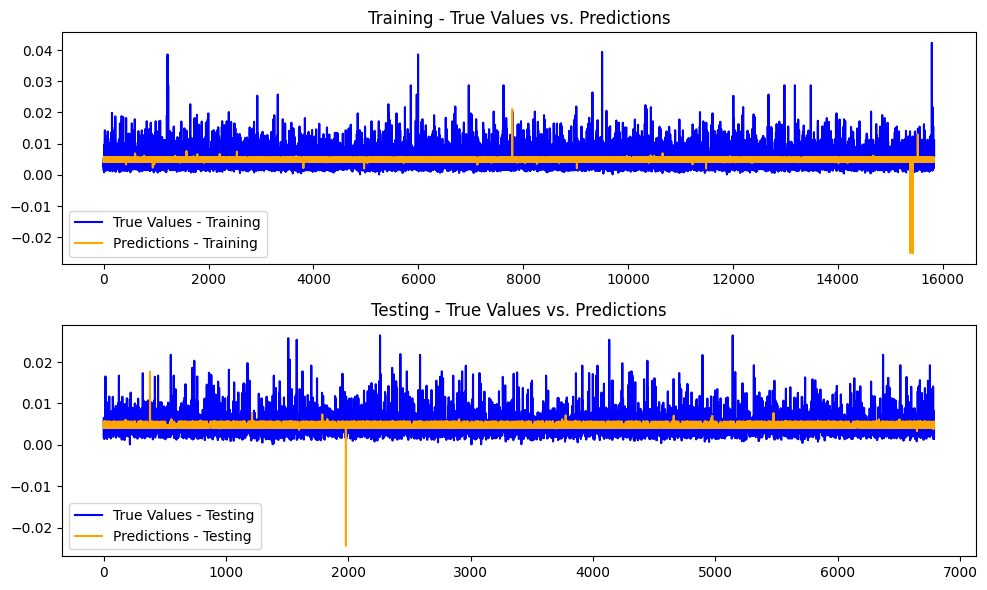

In [73]:
# Calculate regression metrics for the training set
y_train_true = y_train.values
mae_train = mean_absolute_error(y_train_true, y_train_pred)
mse_train = mean_squared_error(y_train_true, y_train_pred)
r2_train = r2_score(y_train_true, y_train_pred)

# Calculate regression metrics for the test set
y_test_true = y_test.values
mae_test = mean_absolute_error(y_test_true, y_test_pred)
mse_test = mean_squared_error(y_test_true, y_test_pred)
r2_test = r2_score(y_test_true, y_test_pred)

# Display the metrics
print(f'Training - MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, R²: {r2_train:.4f}')
print(f'Testing - MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, R²: {r2_test:.4f}')

# Plot the predictions against the true values
print(f'True Values - Training: {y_train_true[:5]}')
print(f'Predictions - Training: {y_train_pred[:5]}')

print(f'True Values - Testing: {y_test_true[:5]}')
print(f'Predictions - Testing: {y_test_pred[:5]}')

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y_train_true, label='True Values - Training', color='blue')
plt.plot(y_train_pred, label='Predictions - Training', color='orange')
plt.title('Training - True Values vs. Predictions')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(y_test_true, label='True Values - Testing', color='blue')
plt.plot(y_test_pred, label='Predictions - Testing', color='orange')
plt.title('Testing - True Values vs. Predictions')
plt.legend()

plt.tight_layout()
plt.show()

The model shows very similar results in both training and testing, indicating consistency in predictions across datasets. The Mean Absolute Error (MAE) and Mean Squared Error (MSE) are relatively low, suggesting that the predictions are close to the actual values. However, the R² is quite low in both sets, indicating that the model explains only a small portion of the variability in the data. When comparing the actual values with the predictions, it is observed that the predictions do not fully capture the variability in the actual data, especially in extreme values. It is possible that the model needs adjustments or additional considerations to enhance its ability to explain the data variability. In summary, the model seems to perform reasonably well in terms of absolute error, but there is room for improvement, particularly in explaining data variability (as indicated by the low R²).

# **PART 4 - Selection and Justification of Performance Indicator**

The chosen performance indicators provide a comprehensive view of the quality of the LSTM and Linear Regression models applied to the data. Let's briefly discuss each chosen metric:

Mean Absolute Error (MAE):

Interpretation: MAE represents the average of the absolute differences between the model predictions and the actual values.
Reason for Choosing: MAE is an intuitive and easy-to-interpret metric. It provides an average estimate of the absolute error in predictions, regardless of the direction of the error.
Mean Squared Error (MSE):

Interpretation: MSE calculates the average of the squared differences between predictions and actual values.
Reason for Choosing: MSE penalizes larger errors more heavily, making it useful for highlighting predictions that deviate significantly from actual values.
R² (Coefficient of Determination):

Interpretation: R² measures the proportion of variability in the data explained by the model.
Reason for Choosing: R² is a valuable metric for assessing the model's ability to capture variability in the data. A higher value indicates a more explanatory model, although interpretation needs to consider other metrics as well.

The choice of these indicators likely stemmed from the need to evaluate different aspects of the model's performance. MAE and MSE provide a direct assessment of prediction accuracy in absolute terms, while R² offers insights into the model's explainability regarding data variability.

It's important to note that the choice of indicators may depend on the specific context of the problem and the model's goals. For instance, in cases where minimizing absolute errors is crucial, the focus might be on MAE. In situations where larger errors are more critical, MSE could be more relevant. The combined use of these indicators provides a more comprehensive understanding of the model's performance.

# **PART 5 - Final Considerations and Next Steps**

In conclusion, this data science project aimed to develop a predictive model for variations in the price amplitude of the EUR/USD currency pair based on sentiment news forecasts from an economic calendar. The project followed a structured approach, encompassing data acquisition, cleaning, exploration, visualization, and feature engineering, as well as the selection and evaluation of machine learning and deep learning models.

**Key Steps:**

1. **Data Acquisition:**
   - Utilized the EUR/USD Forex Trading dataset from Kaggle and economic calendar data from Investing.com.
   - Fragmented collection of calendar data in 2-year intervals from 2010 to avoid errors.

2. **Data Cleaning and Treatment:**
   - Cleaned and treated both EUR/USD and economic calendar datasets.
   - Engineered features such as price amplitude, date components, and currency importance.

3. **Model Selection:**
   - Chose both non-deep (Linear Regression) and deep (LSTM) models for prediction.
   - Adjusted hyperparameters for optimal results.

4. **Performance Metrics:**
   - Evaluated models using metrics such as MAE, MSE, and R², providing a comprehensive assessment of accuracy and explanatory power.

5. **Final Considerations:**
   - Linear Regression showed better performance in terms of absolute error metrics.
   - LSTM demonstrated consistent but modest performance, with room for improvement.

**Next Steps:**

1. **Further Feature Engineering:**
   - Explore additional features or refine existing ones to enhance model understanding.

2. **Hyperparameter Tuning:**
   - Conduct more in-depth hyperparameter tuning for both models to optimize performance.

3. **Ensemble Models:**
   - Consider implementing ensemble models to combine the strengths of different algorithms.

4. **Data Augmentation:**
   - Explore data augmentation techniques to increase dataset size and model robustness.

5. **Fine-Tuning LSTM Architecture:**
   - Experiment with different LSTM architectures and configurations for improved results.

6. **Evaluation on Unseen Data:**
   - Assess model performance on entirely new data to ensure generalizability.

7. **Deployment Considerations:**
   - Explore deployment options for the predictive model, considering real-time prediction capabilities.

Overall, the project lays the foundation for predictive modeling in the financial domain, and further refinements and experiments can lead to more robust models with improved forecasting capabilities.